**Problem statement 1 - Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [48]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [51]:
fraud =pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
# we have to convert yes and no data to the 1 and 0 from 1st and last column and also from the marital status column
# add one more column to this as risk having yes or no or zero or one using the <=30000 as given in problem

In [52]:
fraud.rename(columns={'Undergrad':'undergrad','Marital.Status':'maritalstatus','Taxable.Income':'taxableincome','City.Population':'citypop','Work.Experience':'workexp'},inplace=True)

In [53]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


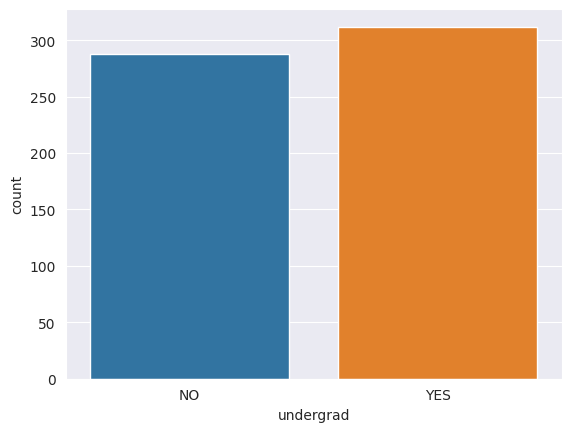

YES    312
NO     288
Name: undergrad, dtype: int64

In [55]:
sns.countplot(x='undergrad',data=fraud)
plt.xlabel('undergrad')
plt.ylabel('count')
plt.show()
fraud['undergrad'].value_counts()

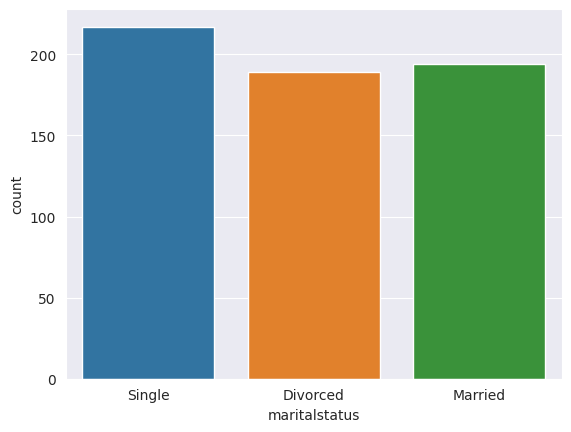

Single      217
Married     194
Divorced    189
Name: maritalstatus, dtype: int64

In [54]:
sns.countplot(x='maritalstatus',data=fraud)
plt.xlabel('maritalstatus')
plt.ylabel('count')
plt.show()
fraud['maritalstatus'].value_counts()

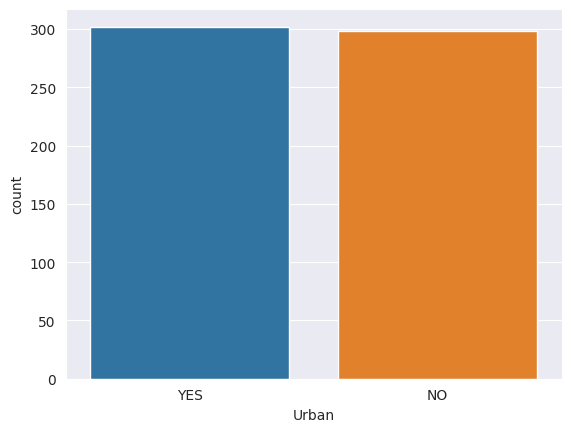

YES    302
NO     298
Name: Urban, dtype: int64

In [57]:
sns.countplot(x='Urban',data=fraud)
plt.xlabel('Urban')
plt.ylabel('count')
plt.show()
fraud['Urban'].value_counts()

In [58]:
fraud.undergrad.replace(('NO','YES'),(0,1),inplace=True)
fraud.Urban.replace(('NO','YES'),(0,1),inplace=True)
fraud.maritalstatus.replace(('Single','Married','Divorced'),(0,1,2),inplace=True)

In [59]:
fraud.isna().sum()

undergrad        0
maritalstatus    0
taxableincome    0
citypop          0
workexp          0
Urban            0
dtype: int64

In [60]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [61]:
l1=[]
for i in list(fraud.taxableincome):
    if i <30000:
        l1.append('Risky')
    elif i==30000:
        l1.append('Risky')
    else:
        l1.append('Good')

In [62]:
fraud['Risk']=pd.DataFrame(l1)
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban,Risk
0,0,0,68833,50047,10,1,Good
1,1,2,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,0,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,Good
596,1,2,69967,55369,2,1,Good
597,0,2,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


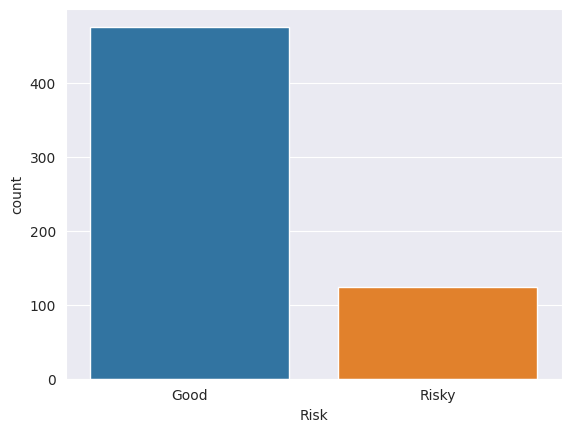

Good     476
Risky    124
Name: Risk, dtype: int64

In [63]:
sns.countplot(x='Risk',data=fraud)
plt.xlabel('Risk')
plt.ylabel('count')
plt.show()
fraud['Risk'].value_counts()

<Axes: xlabel='workexp', ylabel='Density'>

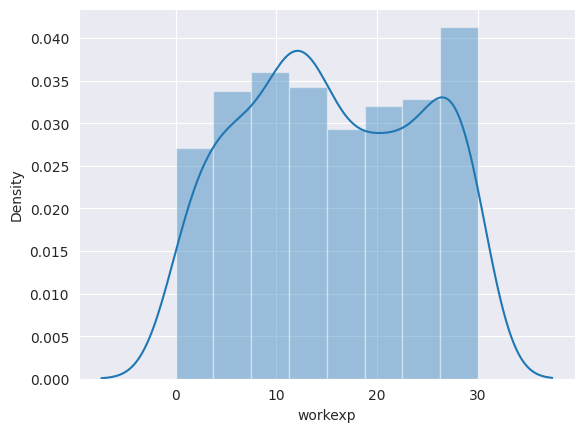

In [64]:
sns.distplot(fraud['workexp'])

In [65]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
fraud['Risk'] = le.fit_transform(fraud.Risk)

In [66]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban,Risk
0,0,0,68833,50047,10,1,0
1,1,2,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,0,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,0
596,1,2,69967,55369,2,1,0
597,0,2,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [67]:
fraud.Risk.value_counts()

0    476
1    124
Name: Risk, dtype: int64

In [68]:
array = fraud.values
array

array([[    0,     0, 68833, ...,    10,     1,     0],
       [    1,     2, 33700, ...,    18,     1,     0],
       [    0,     1, 36925, ...,    30,     1,     0],
       ...,
       [    0,     2, 47334, ...,     0,     1,     0],
       [    1,     1, 98592, ...,    17,     0,     0],
       [    0,     2, 96519, ...,    16,     0,     0]])

In [69]:
x=array[0::,0:6:1]
x

array([[     0,      0,  68833,  50047,     10,      1],
       [     1,      2,  33700, 134075,     18,      1],
       [     0,      1,  36925, 160205,     30,      1],
       ...,
       [     0,      2,  47334, 154058,      0,      1],
       [     1,      1,  98592, 180083,     17,      0],
       [     0,      2,  96519, 158137,     16,      0]])

In [70]:
y=array[0::,6:7:]
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=6)



In [72]:
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=6)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9983333333333334


In [ ]:
# hence our model is giving test accuracy of 99.83%

**Problem Statement 2: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.**

In [ ]:
# so here Sales is y variable and all other are x variable and we have to find variable which causes high sales

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [6]:
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [8]:
company.ShelveLoc.replace(('Bad','Medium','Good'),(0,1,2),inplace=True)
company.Urban.replace(('No','Yes'),(0,1),inplace=True)
company.US.replace(('No','Yes'),(0,1),inplace=True)

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


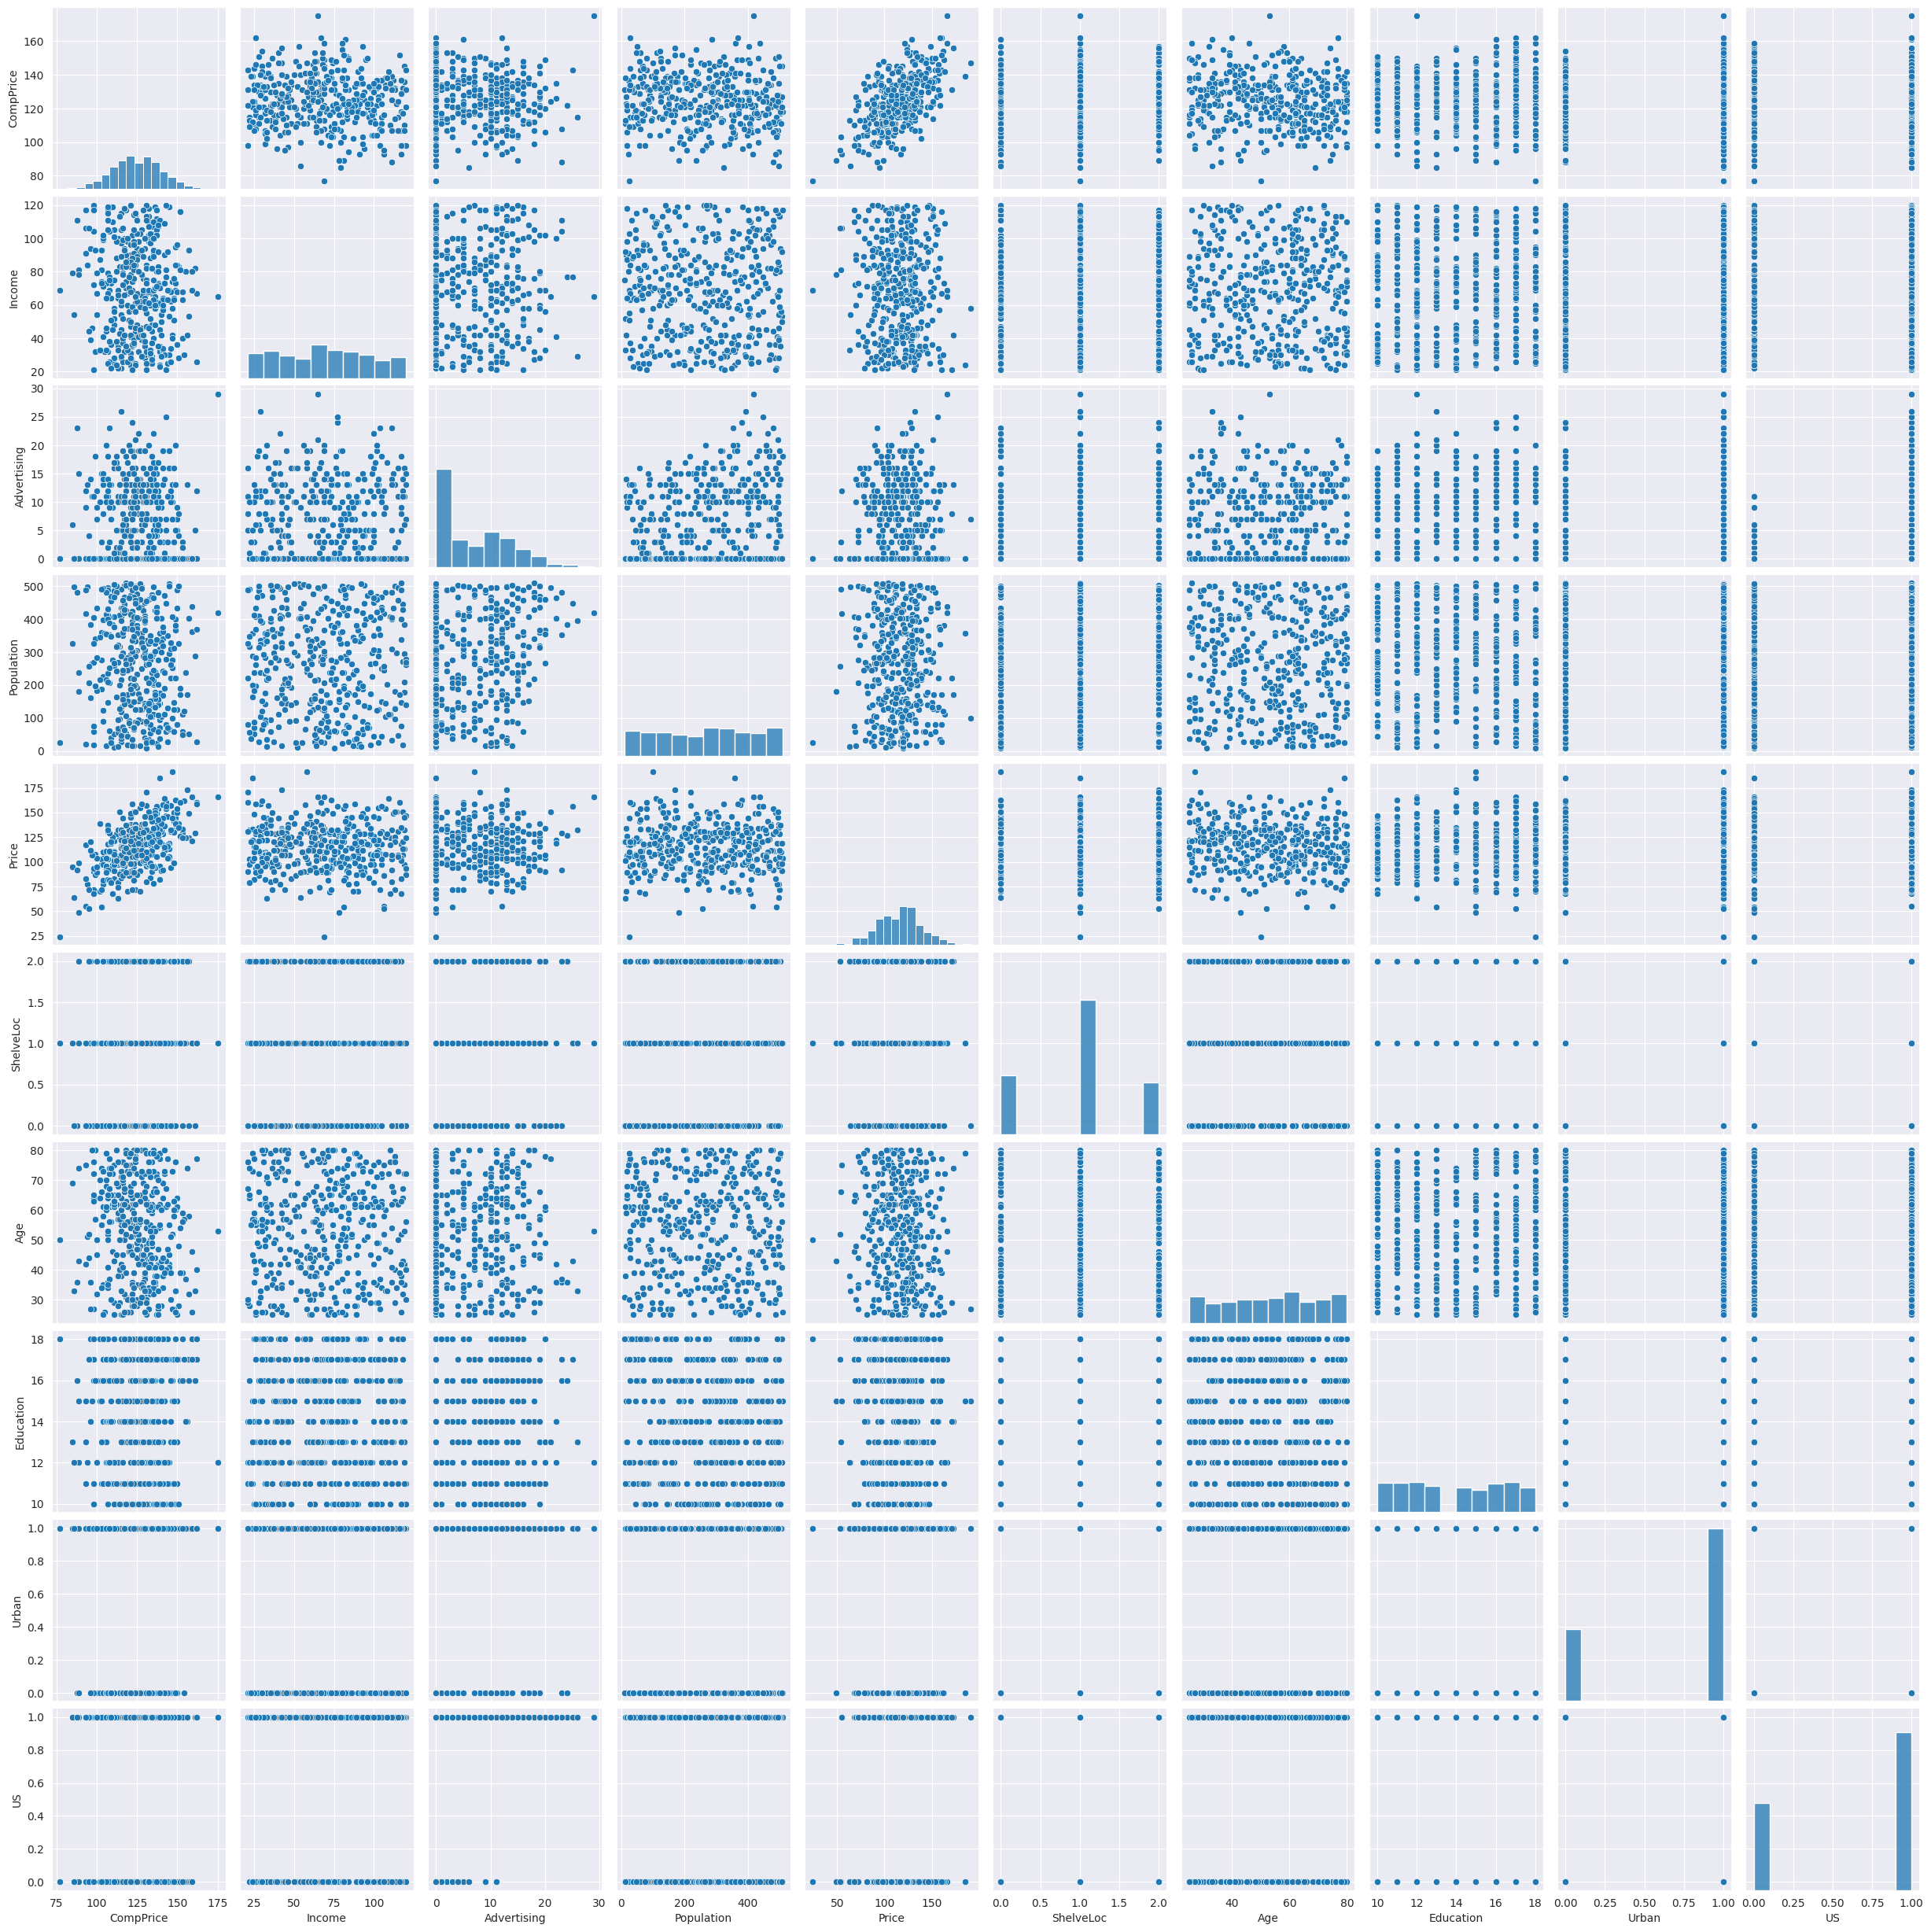

In [17]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(company)

In [ ]:
# Sales need to be in the categorical variable and how to convert this into two category i.e high and low

In [ ]:
# First categories the sales into two groups i.e. high and low based on less than 10 and greater than 10
# make it the seperate new column added to our data and delete old column

In [10]:
l5=[]
for i in list(company.Sales):
    if i <10:
        l5.append('low')
    elif i==10:
        l5.append('high')
    else:
        l5.append('high')

In [11]:
company['Sales']=pd.DataFrame(l5)
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,low,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,2,65,10,1,1
2,high,113,35,10,269,80,1,59,12,1,1
3,low,117,100,4,466,97,1,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,2,33,14,1,1
396,low,139,23,3,37,120,1,55,11,0,1
397,low,162,26,12,368,159,1,40,18,1,1
398,low,100,79,7,284,95,0,50,12,1,1


In [12]:
company.Sales.value_counts()

low     321
high     79
Name: Sales, dtype: int64

In [13]:
array1= company.values

In [14]:
x1= array1[0::,1:11:]
x1

array([[138, 73, 11, ..., 17, 1, 1],
       [111, 48, 16, ..., 10, 1, 1],
       [113, 35, 10, ..., 12, 1, 1],
       ...,
       [162, 26, 12, ..., 18, 1, 1],
       [100, 79, 7, ..., 12, 1, 1],
       [134, 37, 0, ..., 16, 1, 1]], dtype=object)

In [18]:
y1= array1[0::,0:1:]
y1

array([['low'],
       ['high'],
       ['high'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['high'],
       ['high'],
       ['low'],
       ['low'],
       ['high'],
       ['high'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['high'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['high'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
      

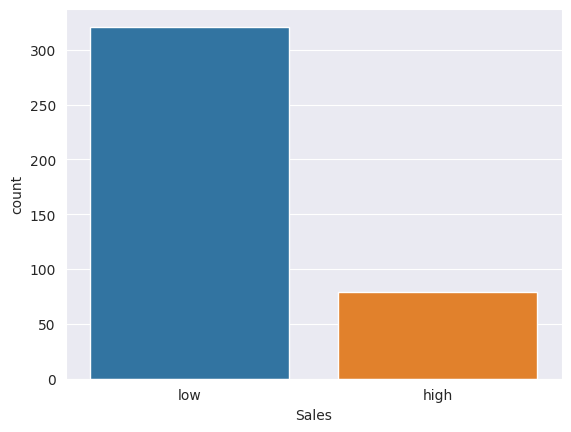

low     321
high     79
Name: Sales, dtype: int64

In [23]:
sns.countplot(x='Sales',data = company)
import matplotlib.pyplot as plt
plt.xlabel('Sales')
plt.ylabel('count')
plt.show()
company['Sales'].value_counts()

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees1 = 100
max_features1 = 8
kfold1 = KFold(n_splits=5)

In [22]:
model1 = RandomForestClassifier(n_estimators=num_trees1, max_samples=0.8,max_features=max_features1,random_state=10)
results1 = cross_val_score(model1, x1, y1, cv=kfold)
print(results1.mean())

0.8824061510628675


In [ ]:
# hence our model1 is giving test accuracy of 88.24%